### Loshak Viktor Lab 3
##### Purpose: to get acquainted with the methodology of primary processing of statistical data; to analyze the impact of the method of data presentation on their informativeness.

1.	Write data to the data frame

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import missingno as msno
import seaborn as sns

In [2]:
df=pd.read_csv('Data2.csv', sep=';', encoding='cp1251')

2. Examine the data structure
    - outputting the beginning of the data
    - outputting the end of the data

In [3]:
df.describe()

,Populatiion
count,2.160000e+02
mean,3.432256e+07
std,1.347600e+08
min,1.109700e+04
25%,7.900265e+05
50%,6.221590e+06
75%,2.350337e+07
max,1.378665e+09


In [4]:
df.head(6)

,Country Name,Region,GDP per capita,Populatiion,CO2 emission,Area
0,Afghanistan,South Asia,"561,7787463",34656032.0,"9809,225",652860
1,Albania,Europe & Central Asia,"4124,98239",2876101.0,"5716,853",28750
2,Algeria,Middle East & North Africa,"3916,881571",40606052.0,"145400,217",2381740
3,American Samoa,East Asia & Pacific,"11834,74523",55599.0,NaN,200
4,Andorra,Europe & Central Asia,"36988,62203",77281.0,"462,042",470
5,Angola,Sub-Saharan Africa,"3308,700233",28813463.0,"34763,16",1246700


In [5]:
df.tail(6)

,Country Name,Region,GDP per capita,Populatiion,CO2 emission,Area
211,Vietnam,East Asia & Pacific,"2170,648054",92701100.0,"166910,839",330967
212,Virgin Islands (U.S.),Latin America & Caribbean,NaN,102951.0,NaN,350
213,West Bank and Gaza,Middle East & North Africa,"2943,404534",4551566.0,NaN,6020
214,"Yemen, Rep.",Middle East & North Africa,"990,334774",27584213.0,"22698,73",527970
215,Zambia,Sub-Saharan Africa,"1269,573537",16591390.0,"4503,076",752610
216,Zimbabwe,Sub-Saharan Africa,"1029,076649",16150362.0,"12020,426",390760


3.	Fix inaccuracies and mistakes in data

In [6]:
df=df.rename(columns={'Populatiion':'Population', 'GDP per capita': 'GDP per capital'})

<AxesSubplot:>

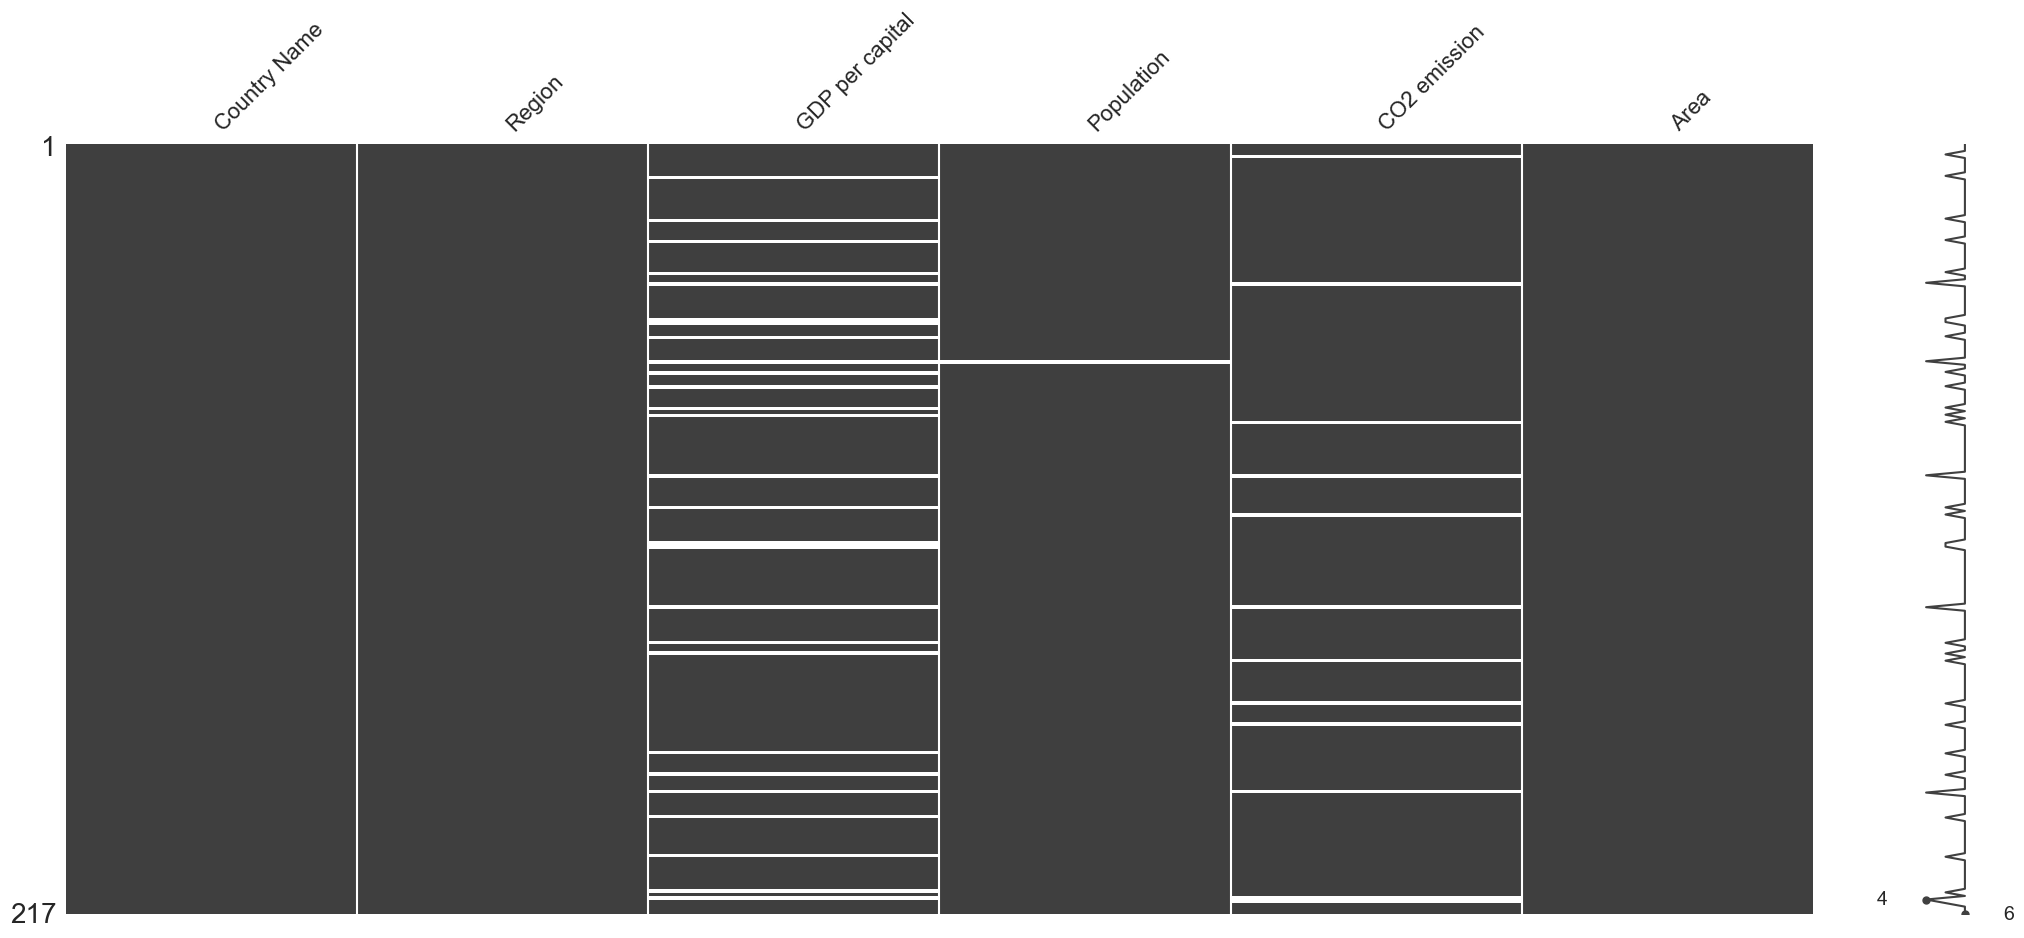

In [7]:
msno.matrix(df)

In [8]:
missing_percentages = df.isna().mean() * 100
print(missing_percentages)

Country Name        0.000000
Region              0.000000
GDP per capital    12.442396
Population          0.460829
CO2 emission        5.529954
Area                0.000000
dtype: float64


Given the small amount of missing data (less than 20 percent in all columns), we can use the list-based delete method to clear the dataframe of missing data.

<AxesSubplot:>

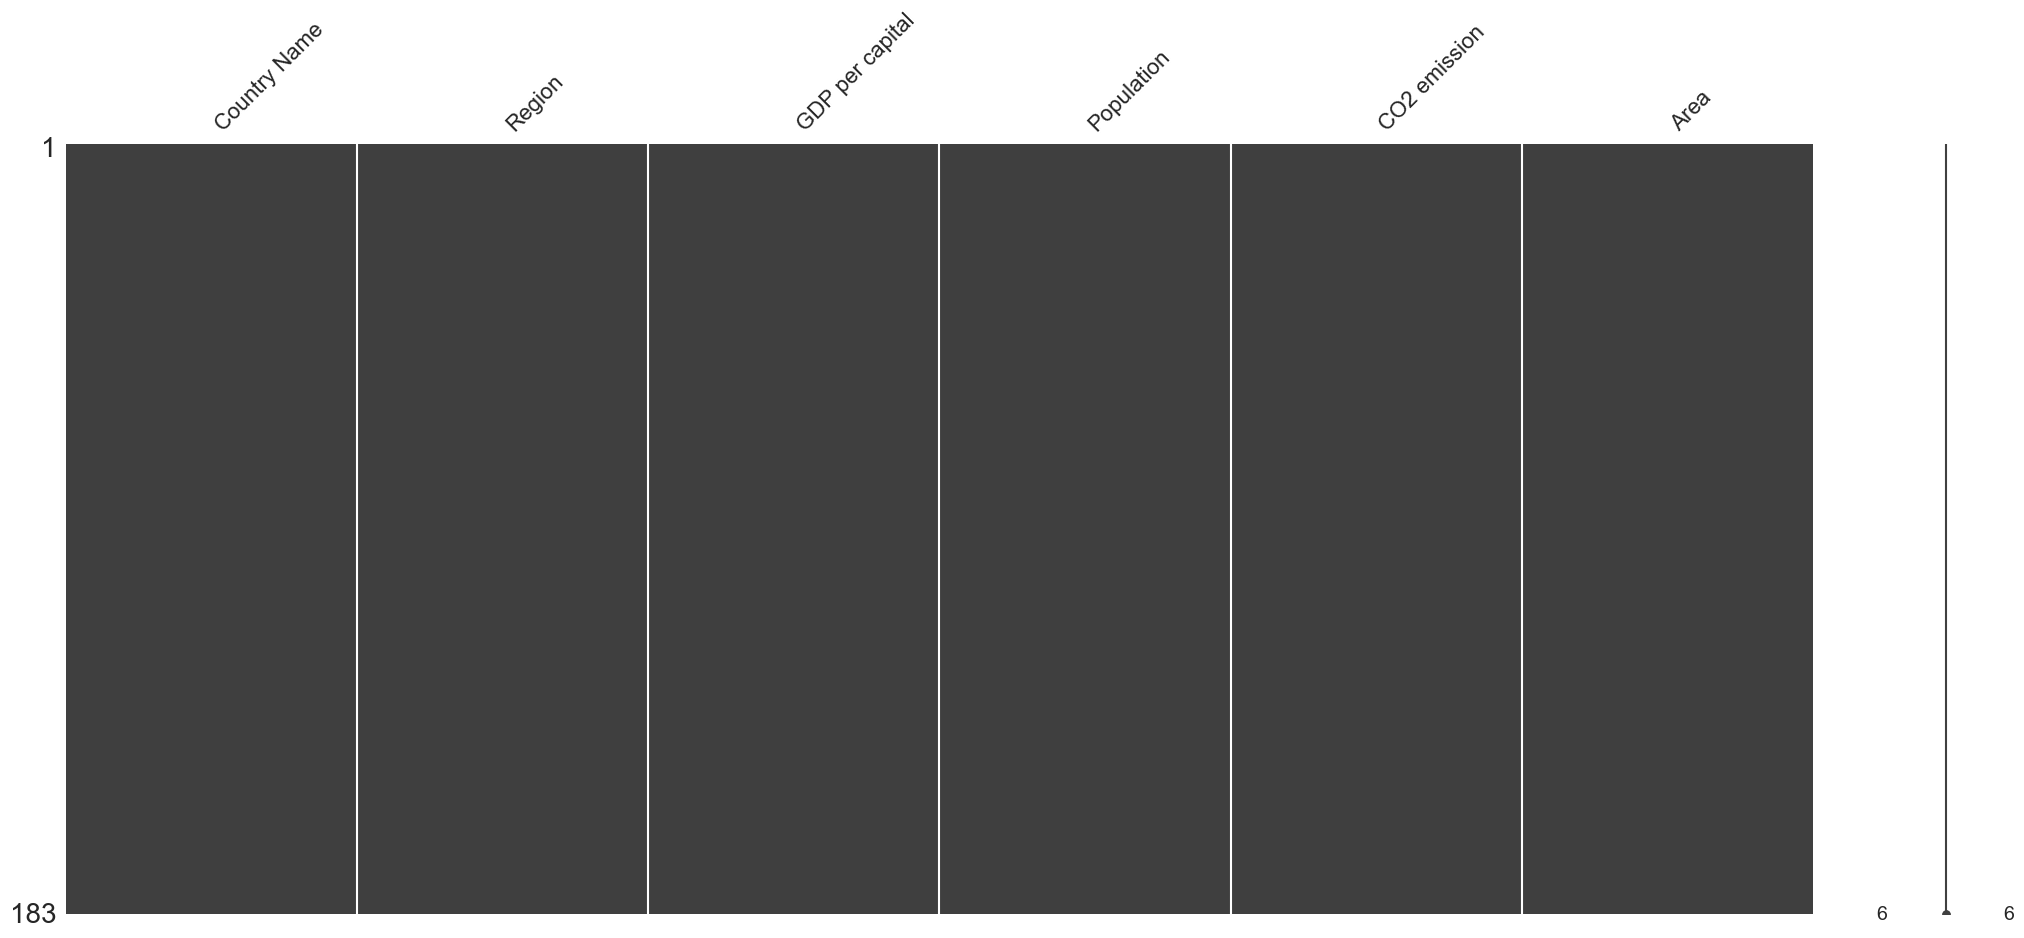

In [9]:
clean_df=df.copy().dropna()
msno.matrix(clean_df)

In [10]:
df[df.duplicated()]

,Country Name,Region,GDP per capital,Population,CO2 emission,Area


Since there are no duplicates in the data, we will skip the step of removing duplicates.

In [11]:
df.dtypes

Country Name        object
Region              object
GDP per capital     object
Population         float64
CO2 emission        object
Area                object
dtype: object

Most of the data is labeled as object, even if it is float. Let's format the data to match the data type.

In [12]:
clean_df['GDP per capital'] = clean_df['GDP per capital'].str.replace(',', '.').astype(float)
clean_df['CO2 emission'] = clean_df['CO2 emission'].str.replace(',','.').astype(float)
clean_df['Area'] = clean_df['Area'].str.replace(',','.').astype(float)
clean_df.dtypes

Country Name        object
Region              object
GDP per capital    float64
Population         float64
CO2 emission       float64
Area               float64
dtype: object

In [13]:
clean_df = clean_df[(clean_df['GDP per capital']>0) & (clean_df['CO2 emission']>0) & (clean_df['Area']>0) & (clean_df['Population']>0)]

4.	Create scatter plots and histograms

In [14]:
def build_boxplot_and_hist(clean_df:pd.DataFrame, col_name:str ):
    fig, axs = plt.subplots(ncols=2, figsize=(10, 5))  # adjust the figsize to your liking
    clean_df.boxplot(column=[col_name], ax=axs[0])
    axs[0].set_title('Boxplot of ' + col_name)
    clean_df[col_name].hist(ax=axs[1])
    axs[1].set_title('Histogram of ' + col_name)
    plt.show()

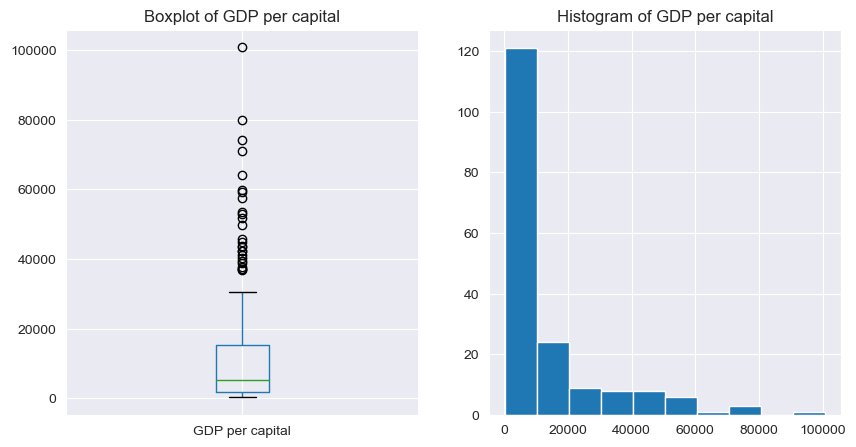

In [15]:
build_boxplot_and_hist(clean_df, 'GDP per capital')

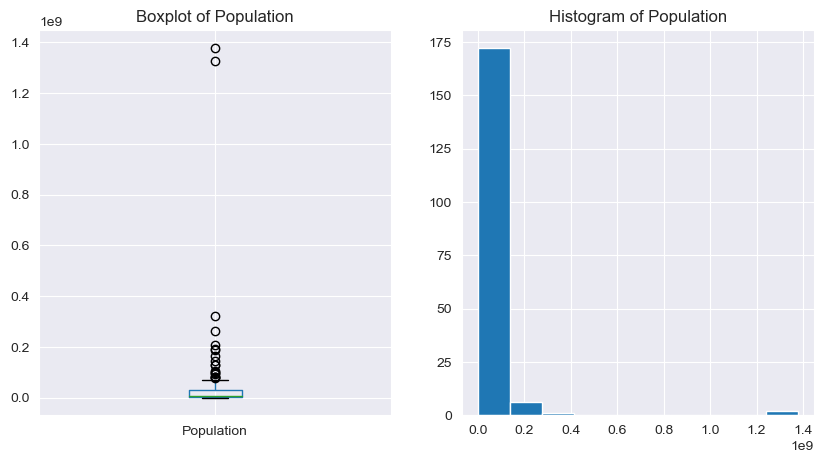

In [16]:
build_boxplot_and_hist(clean_df, 'Population')

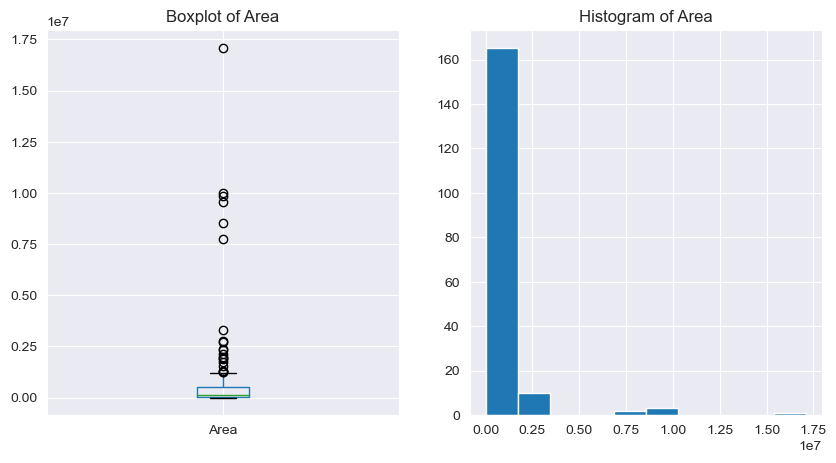

In [17]:
build_boxplot_and_hist(clean_df, 'Area')

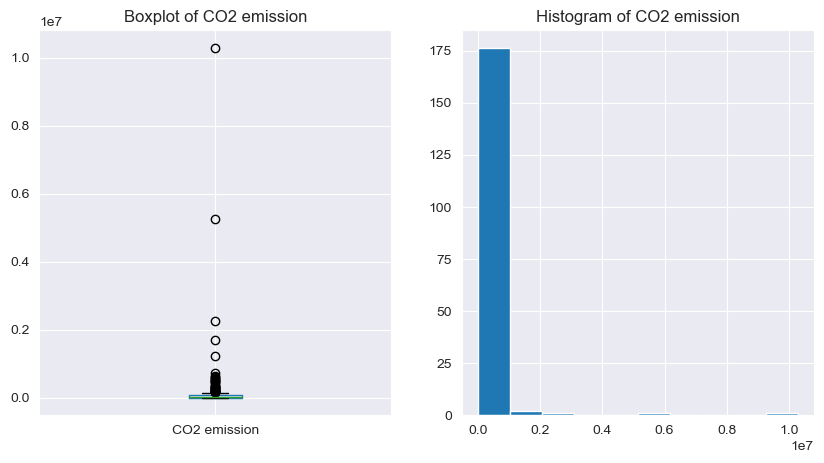

In [18]:
build_boxplot_and_hist(clean_df, 'CO2 emission')

5.	Add column with population density

In [19]:
clean_df['Population Density'] = clean_df['Area'] / clean_df['Population']
clean_df

,Country Name,Region,GDP per capital,Population,CO2 emission,Area,Population Density
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225,652860.0,0.018838
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5716.853,28750.0,0.009996
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217,2381740.0,0.058655
4,Andorra,Europe & Central Asia,36988.622030,77281.0,462.042,470.0,0.006082
5,Angola,Sub-Saharan Africa,3308.700233,28813463.0,34763.160,1246700.0,0.043268
...,...,...,...,...,...,...,...
209,Vanuatu,East Asia & Pacific,2860.566475,270402.0,154.014,12190.0,0.045081
211,Vietnam,East Asia & Pacific,2170.648054,92701100.0,166910.839,330967.0,0.003570
214,"Yemen, Rep.",Middle East & North Africa,990.334774,27584213.0,22698.730,527970.0,0.019140
215,Zambia,Sub-Saharan Africa,1269.573537,16591390.0,4503.076,752610.0,0.045361
